In [2]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

In [3]:
import requests

In [ ]:
from bs4 import BeautifulSoup

url = 'https://www.pro-football-reference.com'
year = 2024

r = requests.get(url + '/years/' + str(year) + '/fantasy.htm')
soup = BeautifulSoup(r.content, 'html.parser')
parsed_table = soup.find_all('table')[0]  

#### NFL verse

In [1]:
pip install nflreadpy

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   -------------------- ------------------- 1.0/2.0 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 5.6 MB/s  0:00:00

   ------ --------------------------------- 1/6 [pydantic-core]
  Attempting uninstall: pydantic
   ------ --------------------------------- 1/6 [pydantic-core]
    Found existing installation: pydantic 1.10.18
   ------ --------------------------------- 1/6 [pydantic-core]
   -------------------- ------------------- 3/6 [pydantic]
    Uninstalling pydantic-1.10.18:
   -------------------- ------------------- 3/6 [pydantic]
      Successfully uninstalled pydantic-1.10.18
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.85.0 requires pydantic!=1.7,!=1.7.1,!=1.7.2,!=1.7.3,!=1.8,!=1.8.1,<2.0.0,>=1.6.2, but you have pydantic 2.12.5 which is incompatible.


In [115]:
import nflreadpy as nfl

# Load current season play-by-play data
pbp = nfl.load_pbp()

# Load player game-level stats for multiple seasons
player_stats = nfl.load_player_stats([i for i in range(2014, 2025)])
player_stats = player_stats.to_pandas()

# Load all available team level stats
team_stats = nfl.load_team_stats(seasons=True)

# nflreadpy uses Polars instead of pandas. Convert to pandas if needed:
pbp_pandas = pbp.to_pandas()

In [11]:
player_info = nfl.load_players()

In [20]:
sched = nfl.load_schedules()
sched = sched.to_pandas()


In [23]:
post_2014 = sched[sched['season'] >= 2014]

In [24]:
post_2014.columns


Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'ftn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')

In [112]:
post_2014

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
3981,2014_01_GB_SEA,2014,REG,1,2014-09-04,Thursday,20:30,GB,16.0,SEA,...,11.0,00-0023459,00-0029263,Aaron Rodgers,Russell Wilson,Mike McCarthy,Pete Carroll,John Parry,SEA00,CenturyLink Field
3982,2014_01_NO_ATL,2014,REG,1,2014-09-07,Sunday,13:00,NO,34.0,ATL,...,NaN,00-0020531,00-0026143,Drew Brees,Matt Ryan,Sean Payton,Mike Smith,Bill Leavy,ATL00,Georgia Dome
3983,2014_01_CIN_BAL,2014,REG,1,2014-09-07,Sunday,13:00,CIN,23.0,BAL,...,8.0,00-0027973,00-0026158,Andy Dalton,Joe Flacco,Marvin Lewis,John Harbaugh,Gene Stetatore,BAL00,M&T Bank Stadium
3984,2014_01_BUF_CHI,2014,REG,1,2014-09-07,Sunday,13:00,BUF,23.0,CHI,...,3.0,00-0030526,00-0024226,EJ Manuel,Jay Cutler,Doug Marrone,Marc Trestman,Brad Allen,CHI98,Soldier Field
3985,2014_01_WAS_HOU,2014,REG,1,2014-09-07,Sunday,13:00,WAS,6.0,HOU,...,NaN,00-0029665,00-0023682,Robert Griffin,Ryan Fitzpatrick,Jay Gruden,Bill O'Brien,Jerome Boger,HOU00,NRG Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258,2025_18_DAL_NYG,2025,REG,18,2026-01-04,Sunday,13:00,DAL,NaN,NYG,...,NaN,None,None,None,None,Brian Schottenheimer,Brian Daboll,None,NYC01,MetLife Stadium
7259,2025_18_WAS_PHI,2025,REG,18,2026-01-04,Sunday,13:00,WAS,NaN,PHI,...,NaN,None,None,None,None,Dan Quinn,Nick Sirianni,None,PHI00,Lincoln Financial Field
7260,2025_18_BAL_PIT,2025,REG,18,2026-01-04,Sunday,13:00,BAL,NaN,PIT,...,NaN,None,None,None,None,John Harbaugh,Mike Tomlin,None,PIT00,Acrisure Stadium
7261,2025_18_SEA_SF,2025,REG,18,2026-01-04,Sunday,13:00,SEA,NaN,SF,...,NaN,None,None,None,None,Mike Macdonald,Kyle Shanahan,None,SFO01,Levi's Stadium


In [53]:
player_stats[player_stats['player_display_name'] == "Patrick Mahomes"]

,player_id,player_name,player_display_name,position,position_group,season,week,season_type,team,opponent_team,...,pat_made,pat_att,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance
69521,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2017,17,REG,KC,DEN,...,0,0,0,0,NaN,0,0,0,0,0
71164,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,1,REG,KC,LAC,...,0,0,0,0,NaN,0,0,0,0,0
72194,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,2,REG,KC,PIT,...,0,0,0,0,NaN,0,0,0,0,0
73240,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,3,REG,KC,SF,...,0,0,0,0,NaN,0,0,0,0,0
74216,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,4,REG,KC,DEN,...,0,0,0,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206482,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,9,REG,KC,BUF,...,0,0,0,0,NaN,0,0,0,0,0
208396,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,11,REG,KC,DEN,...,0,0,0,0,NaN,0,0,0,0,0
209419,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,12,REG,KC,IND,...,0,0,0,0,NaN,0,0,0,0,0
210405,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,13,REG,KC,DAL,...,0,0,0,0,NaN,0,0,0,0,0


In [30]:
team_stats.to_pandas()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,pat_made,pat_att,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance
0,1999,1,ARI,REG,PHI,25,48,274,1,3,...,1,1,0,0,1.0,1,1,0,0,31
1,1999,1,ATL,REG,MIN,18,31,290,1,0,...,2,2,0,0,1.0,0,0,0,0,0
2,1999,1,BUF,REG,IND,22,42,300,1,2,...,0,0,0,0,NaN,0,0,0,0,0
3,1999,1,CAR,REG,NO,16,32,207,1,1,...,1,1,0,0,1.0,0,0,0,0,0
4,1999,1,CHI,REG,KC,31,47,322,2,0,...,2,2,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,2025,14,PIT,REG,BAL,23,34,284,1,0,...,3,3,0,0,1.0,0,0,0,0,0
14373,2025,14,SEA,REG,ATL,20,30,249,3,1,...,4,4,0,0,1.0,0,0,0,0,0
14374,2025,14,TB,REG,NO,14,30,122,1,1,...,2,2,0,0,1.0,0,0,0,0,0
14375,2025,14,TEN,REG,CLE,14,28,117,2,1,...,4,4,0,0,1.0,0,0,0,0,0


In [39]:
player_info.columns

['gsis_id',
 'display_name',
 'common_first_name',
 'first_name',
 'last_name',
 'short_name',
 'football_name',
 'suffix',
 'esb_id',
 'nfl_id',
 'pfr_id',
 'pff_id',
 'otc_id',
 'espn_id',
 'smart_id',
 'birth_date',
 'position_group',
 'position',
 'ngs_position_group',
 'ngs_position',
 'height',
 'weight',
 'headshot',
 'college_name',
 'college_conference',
 'jersey_number',
 'rookie_season',
 'last_season',
 'latest_team',
 'status',
 'ngs_status',
 'ngs_status_short_description',
 'years_of_experience',
 'pff_position',
 'pff_status',
 'draft_year',
 'draft_round',
 'draft_pick',
 'draft_team']

In [114]:
player_stats

,player_id,player_name,player_display_name,position,position_group,season,week,season_type,team,opponent_team,...,pat_made,pat_att,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance
0,00-0004091,P.Dawson,Phil Dawson,K,SPEC,2014,1,REG,SF,DAL,...,4,4,0,0,1.0,0,0,0,0,0
1,00-0010346,P.Manning,Peyton Manning,QB,QB,2014,1,REG,DEN,IND,...,0,0,0,0,NaN,0,0,0,0,0
2,00-0016919,A.Vinatieri,Adam Vinatieri,K,SPEC,2014,1,REG,IND,DEN,...,3,3,0,0,1.0,0,0,0,0,0
3,00-0018227,C.Woodson,Charles Woodson,FS,DB,2014,1,REG,LV,NYJ,...,0,0,0,0,NaN,0,0,0,0,0
4,00-0019536,S.Graham,Shayne Graham,K,SPEC,2014,1,REG,NO,ATL,...,4,4,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212317,00-0040745,A.Ersery,Aireontae Ersery,OT,OL,2025,14,REG,HOU,KC,...,0,0,0,0,NaN,0,0,0,0,0
212318,00-0040751,W.Johnson,Will Johnson,CB,DB,2025,14,REG,ARI,LA,...,0,0,0,0,NaN,0,0,0,0,0
212319,00-0040782,I.Bond,Isaiah Bond,WR,WR,2025,14,REG,CLE,TEN,...,0,0,0,0,NaN,0,0,0,0,0
212320,00-0040784,Q.Judkins,Quinshon Judkins,RB,RB,2025,14,REG,CLE,TEN,...,0,0,0,0,NaN,0,0,0,0,0


In [142]:
player = player_info[['gsis_id', 'pfr_id', 'display_name', 'birth_date', 'position_group', 'position', 'height', 'weight']].to_pandas()

In [143]:
player

,gsis_id,pfr_id,display_name,birth_date,position_group,position,height,weight
0,00-0028830,AaitIs00,Isaako Aaitui,1987-01-25,DL,NT,76.0,307.0
1,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,RB,RB,70.0,216.0
2,00-0024644,None,Jon Abbate,1985-06-18,LB,LB,71.0,245.0
3,ABB498348,abbotvin01,Vince Abbott,1958-05-31,SPEC,K,71.0,207.0
4,00-0031021,AbbrJa00,Jared Abbrederis,1990-12-17,WR,WR,73.0,195.0
...,...,...,...,...,...,...,...,...
24336,00-0034508,deBeGe00,Gerhard de Beer,1994-07-05,OL,OT,78.0,312.0
24337,DEB622935,deBrCa20,Case deBruijn,1960-04-11,SPEC,P,72.0,176.0
24338,VAN516304,VanEMa00,Mark van Eeghen,1952-04-19,RB,RB,74.0,223.0
24339,00-0016956,vonOKi20,Kimo von Oelhoffen,1971-01-30,DL,DT,76.0,299.0


In [46]:
injuries = nfl.load_injuries([i for i in range(2014, 2025)])

In [63]:
injuries = injuries.to_pandas()
injuries.head()

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2014.0,REG,ARI,1.0,00-0030503,LB,Alex Okafor,Alex,Okafor,Thigh,None,Out,Thigh,None,Did Not Participate In Practice,2014-09-06 13:47:47+00:00
1,2014.0,REG,ARI,1.0,00-0030459,S,Tyrann Mathieu,Tyrann,Mathieu,Knee,None,Questionable,Knee,None,Full Participation in Practice,2014-09-06 13:48:40+00:00
2,2014.0,REG,ARI,1.0,00-0030287,RB,Andre Ellington,Andre,Ellington,Foot,None,Questionable,Foot,None,Limited Participation in Practice,2014-09-06 13:48:09+00:00
3,2014.0,REG,ARI,1.0,00-0021235,P,Dave Zastudil,Dave,Zastudil,left Groin,None,Questionable,left Groin,None,Limited Participation in Practice,2014-09-06 13:48:02+00:00
4,2014.0,REG,ARI,1.0,00-0030590,G,Jonathan Cooper,Jonathan,Cooper,Toe,None,Probable,Toe,None,Full Participation in Practice,2014-09-06 13:47:38+00:00


In [56]:
injuries['practice_secondary_injury'].value_counts()

practice_secondary_injury,count
str,u32
"""Rest""",4
"""Neck, Back""",1
"""Ankle, Knee""",1
"""Elbow""",68
"""Resting Vet""",3
…,…
"""elbow, knee""",1
"""Personal""",1
"""Achilles""",29


In [78]:
injuries

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2014.0,REG,ARI,1.0,00-0030503,LB,Alex Okafor,Alex,Okafor,Thigh,None,Out,Thigh,None,Did Not Participate In Practice,2014-09-06 13:47:47+00:00
1,2014.0,REG,ARI,1.0,00-0030459,S,Tyrann Mathieu,Tyrann,Mathieu,Knee,None,Questionable,Knee,None,Full Participation in Practice,2014-09-06 13:48:40+00:00
2,2014.0,REG,ARI,1.0,00-0030287,RB,Andre Ellington,Andre,Ellington,Foot,None,Questionable,Foot,None,Limited Participation in Practice,2014-09-06 13:48:09+00:00
3,2014.0,REG,ARI,1.0,00-0021235,P,Dave Zastudil,Dave,Zastudil,left Groin,None,Questionable,left Groin,None,Limited Participation in Practice,2014-09-06 13:48:02+00:00
4,2014.0,REG,ARI,1.0,00-0030590,G,Jonathan Cooper,Jonathan,Cooper,Toe,None,Probable,Toe,None,Full Participation in Practice,2014-09-06 13:47:38+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59793,2024.0,SB,PHI,22.0,00-0036912,WR,DeVonta Smith,DeVonta,Smith,None,None,None,Hamstring,None,Limited Participation in Practice,2025-02-07 20:29:05+00:00
59794,2024.0,SB,PHI,22.0,00-0037132,WR,Britain Covey,Britain,Covey,Neck,None,Out,Neck,None,Full Participation in Practice,2025-02-07 20:32:07+00:00
59795,2024.0,SB,PHI,22.0,00-0027865,DE,Brandon Graham,Brandon,Graham,Elbow,None,Questionable,Elbow,None,Full Participation in Practice,2025-02-07 20:31:06+00:00
59796,2024.0,SB,PHI,22.0,00-0032134,TE,C.J. Uzomah,C.J.,Uzomah,Abdomen,None,Questionable,Abdomen,None,Full Participation in Practice,2025-02-07 20:31:06+00:00


In [101]:
pos_injuries = injuries.groupby('position').size()

In [103]:
pos_injuries


position
\n          12
C         1882
CB        7229
DE        4751
DT        4539
FB         135
G         3713
K          376
LB        8337
LS         181
P          230
QB        2028
RB        4726
S         4866
T         5051
TE        3883
WR        7859
dtype: int64

In [100]:
pos_injuries

,position,0
1,C,1882
2,CB,7229
3,DE,4751
4,DT,4539
5,FB,135
6,G,3713
7,K,376
8,LB,8337
9,LS,181
10,P,230


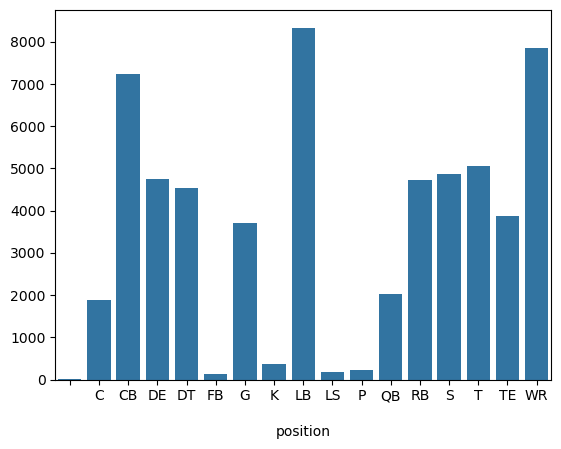

In [104]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.barplot(pos_injuries)
plt.show()

In [48]:
player_stats.drop(columns=['headshot_url', 'fantasy_points', 'fantasy_points_ppr'], inplace=True)

In [58]:
participation = nfl.load_participation([i for i in range(2016, 2025)])

In [59]:
participation.head()

nflverse_game_id,old_game_id,play_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type,offense_names,defense_names,offense_positions,defense_positions,offense_numbers,defense_numbers
str,str,f64,str,str,str,i32,str,i32,str,str,str,i32,i32,f64,f64,bool,str,str,str,str,str,str,str,str,str
"""2016_01_CAR_DEN""","""2016090800""",1.0,"""""",null,null,null,null,null,"""""","""""","""""",0,0,null,null,null,null,null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",36.0,"""CAR""",null,null,null,null,null,"""41285;42728;39857;43366;35656;…","""00-0029731;00-0032891;00-00315…","""00-0031344;00-0031697;00-00278…",11,11,null,null,null,null,null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",51.0,"""DEN""","""SINGLEBACK""","""1 RB, 1 TE, 3 WR""",6,"""4 DL, 2 LB, 5 DB""",4,"""35521;42593;41377;35685;35461;…","""00-0027685;00-0032156;00-00278…","""00-0031262;00-0027835;00-00313…",11,11,-1.21,2.323,false,"""SCREEN""",null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",75.0,"""DEN""","""I_FORM""","""6 OL, 2 RB, 0 TE, 2 WR""",8,"""4 DL, 3 LB, 4 DB""",6,"""42368;41377;42593;35521;41285;…","""00-0032156;00-0027685;00-00313…","""00-0031550;00-0031262;00-00278…",10,11,-2.22,2.893,true,"""FLAT""",null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",97.0,"""DEN""","""SINGLEBACK""","""1 RB, 1 TE, 3 WR""",7,"""4 DL, 2 LB, 5 DB""",3,"""41285;42476;43351;38539;39992;…","""00-0031344;00-0032132;00-00295…","""00-0032890;00-0029248;00-00304…",11,11,4.91,2.556,false,"""OUT""",null,null,null,null,null,null,null,null


In [107]:
rosters = nfl.load_rosters_weekly([i for i in range(2014, 2026)]).to_pandas()

In [108]:
rosters

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
0,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
1,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
2,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
3,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
4,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517560,2025,HOU,TE,TE,None,DEV,Layne Pryor,Layne,Pryor,NaT,...,REG,P02,Layne,PRY456541,59332,None,2025.0,2025.0,None,None
517561,2025,HOU,TE,TE,49,DEV,Layne Pryor,Layne,Pryor,NaT,...,REG,P02,Layne,PRY456541,59332,None,2025.0,2025.0,None,None
517562,2025,HOU,TE,TE,None,DEV,Layne Pryor,Layne,Pryor,NaT,...,REG,P02,Layne,PRY456541,59332,None,2025.0,2025.0,None,None
517563,2025,NYJ,DL,DE,54,DEV,Paschal Ekeji,Paschal,Ekeji,NaT,...,REG,P03,Paschal,EKE080143,59345,None,2025.0,2025.0,None,None


In [110]:
snap_counts = nfl.load_snap_counts([i for i in range(2014, 2026)]).to_pandas()

In [111]:
snap_counts

,game_id,pfr_game_id,season,game_type,week,player,pfr_player_id,position,team,opponent,offense_snaps,offense_pct,defense_snaps,defense_pct,st_snaps,st_pct
0,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jordan Mills,MillJo02,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
1,2014_01_BUF_CHI,201409070chi,2014,REG,1,Kyle Long,LongKy00,G,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
2,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jermon Bushrod,BushJe20,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
3,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jay Cutler,CutlJa00,QB,CHI,BUF,74.0,1.00,0.0,0.0,0.0,0.00
4,2014_01_BUF_CHI,201409070chi,2014,REG,1,Martellus Bennett,BennMa00,TE,CHI,BUF,70.0,0.95,0.0,0.0,4.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293630,2025_14_WAS_MIN,202512070min,2025,REG,14,Kain Medrano,MedrKa00,LB,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293631,2025_14_WAS_MIN,202512070min,2025,REG,14,Percy Butler,ButlPe00,S,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293632,2025_14_WAS_MIN,202512070min,2025,REG,14,Tyler Ott,OttxTy00,LS,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19
293633,2025_14_WAS_MIN,202512070min,2025,REG,14,Tress Way,WayxTr00,P,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19


In [141]:
player_info

gsis_id,display_name,common_first_name,first_name,last_name,short_name,football_name,suffix,esb_id,nfl_id,pfr_id,pff_id,otc_id,espn_id,smart_id,birth_date,position_group,position,ngs_position_group,ngs_position,height,weight,headshot,college_name,college_conference,jersey_number,rookie_season,last_season,latest_team,status,ngs_status,ngs_status_short_description,years_of_experience,pff_position,pff_status,draft_year,draft_round,draft_pick,draft_team
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i32,i32,str,str,str,str,i32,i32,str,str,str,str,i32,str,str,i32,i32,i32,str
"""00-0028830""","""Isaako Aaitui""","""Isaako""","""Isaako""","""Aaitui""",null,null,null,"""AAI622937""",null,"""AaitIs00""","""6998""","""2535""","""14856""","""32004141-4962-2937-61ff-017b18…","""1987-01-25""","""DL""","""NT""",null,null,76,307,"""https://static.www.nfl.com/ima…","""UNLV""",null,"""0""",2011,2014,"""WAS""","""DEV""",null,null,2,"""DI""",null,null,null,null,null
"""00-0038389""","""Israel Abanikanda""","""Israel""","""Israel""","""Abanikanda""","""I.Abanikanda""","""Israel""",null,"""ABA159567""","""56008""","""AbanIs00""","""122999""","""10967""","""4429202""","""32004142-4115-9567-2e24-0eab29…","""2002-10-05""","""RB""","""RB""","""RB""","""RB""",70,216,"""https://static.www.nfl.com/ima…","""Pittsburgh""","""Atlantic Coast Conference""",null,2023,2025,"""DAL""","""DEV""","""DEV""","""Practice Squad""",3,"""HB""","""A""",2023,5,143,"""NYJ"""
"""00-0024644""","""Jon Abbate""","""Jon""","""Jon""","""Abbate""",null,null,null,"""ABB051371""",null,null,null,null,null,"""32004142-4205-1371-db95-1abc96…","""1985-06-18""","""LB""","""LB""",null,null,71,245,"""https://static.www.nfl.com/ima…","""Wake Forest""",null,"""67""",2007,2007,"""HOU""","""RES""",null,null,0,null,null,null,null,null,null
"""ABB498348""","""Vince Abbott""","""Vince""","""Vincent""","""Abbott""",null,null,null,"""ABB498348""",null,"""abbotvin01""",null,null,null,"""32004142-4249-8348-e00f-5fbbe6…","""1958-05-31""","""SPEC""","""K""",null,null,71,207,"""https://static.www.nfl.com/ima…","""California State-Fullerton; Wa…",null,"""0""",1987,1988,"""LAC""","""ACT""",null,null,2,null,null,null,null,null,null
"""00-0031021""","""Jared Abbrederis""","""Jared""","""Jared""","""Abbrederis""","""J.Abbrederis""","""Jared""",null,"""ABB650964""","""41405""","""AbbrJa00""","""8811""","""3115""","""16836""","""32004142-4265-0964-fc36-bb0ad7…","""1990-12-17""","""WR""","""WR""","""WR""","""WR""",73,195,"""https://static.www.nfl.com/ima…","""Wisconsin""",null,"""10""",2014,2017,"""DET""","""CUT""","""CUT""",null,4,"""WR""",null,2014,5,176,"""GB"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""00-0034508""","""Gerhard de Beer""","""Gerhard""","""Gerhard""","""de Beer""","""G.de Beer""","""Gerhard""",null,"""DEB150981""","""46692""","""deBeGe00""","""46960""","""7212""","""3056440""","""32004445-4215-0981-d8fc-083843…","""1994-07-05""","""OL""","""OT""",null,null,78,312,"""https://static.www.nfl.com/ima…","""Arizona""",null,"""0""",2018,2018,"""GB""","""DEV""","""CUT""",null,0,null,null,null,null,null,null
"""DEB622935""","""Case deBruijn""","""Case""","""Case""","""deBruijn""",null,null,null,"""DEB622935""",null,"""deBrCa20""",null,null,null,"""32004445-4262-2935-c44d-416ca8…","""1960-04-11""","""SPEC""","""P""",null,null,72,176,"""https://static.www.nfl.com/ima…","""Idaho State""",null,"""0""",1982,1982,"""KC""","""ACT""",null,null,0,null,null,1982,8,214,"""KC"""
"""VAN516304""","""Mark van Eeghen""","""Mark""","""Mark""","""van Eeghen""",null,null,null,"""VAN516304""",null,"""VanEMa00""",null,null,null,"""32005641-4e51-6304-9ea7-e13b6d…","""1952-04-19""","""RB""","""RB""",null,null,74,223,"""https://static.www.nfl.com/ima…","""Colgate""",null,"""0""",1974,1983,"""NE""","""ACT""",null,null,10,null,null,1974,3,75,"""LV"""


### merging:
 How do bye-week timing and rest differentials affect injury / re-injury risk?  

Thoughts:
- Player-game level granularity 
- merge schedule and snap counts in like game id??
- merge weekly roster to snap counts? or smth on player id, week, season?
- merge injuries on player id, week, season?
basically get things like which player was injured / how much they played each week for each season
- can maybe calculate per player or something differences in playing days (rest time)??

In [124]:
player

,gsis_id,display_name,birth_date,position_group,position,height,weight
0,00-0028830,Isaako Aaitui,1987-01-25,DL,NT,76.0,307.0
1,00-0038389,Israel Abanikanda,2002-10-05,RB,RB,70.0,216.0
2,00-0024644,Jon Abbate,1985-06-18,LB,LB,71.0,245.0
3,ABB498348,Vince Abbott,1958-05-31,SPEC,K,71.0,207.0
4,00-0031021,Jared Abbrederis,1990-12-17,WR,WR,73.0,195.0
...,...,...,...,...,...,...,...
24336,00-0034508,Gerhard de Beer,1994-07-05,OL,OT,78.0,312.0
24337,DEB622935,Case deBruijn,1960-04-11,SPEC,P,72.0,176.0
24338,VAN516304,Mark van Eeghen,1952-04-19,RB,RB,74.0,223.0
24339,00-0016956,Kimo von Oelhoffen,1971-01-30,DL,DT,76.0,299.0


##### merge player info and stats

In [ ]:
# rename merge column to match 
player_stats.rename({"player_id": "gsis_id"}, axis=1, inplace=True)

In [144]:
player_stats_merged = pd.merge(player, player_stats, how="inner", on="gsis_id", indicator=True, validate="1:m")

In [145]:
# validate merge
player_stats_merged._merge.value_counts()

_merge
both          197831
left_only          0
right_only         0
Name: count, dtype: int64

In [131]:
player_stats_merged

,gsis_id,display_name,birth_date,position_group_x,position_x,height,weight,player_name,player_display_name,position_y,...,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr,_merge
0,00-0038389,Israel Abanikanda,2002-10-05,RB,RB,70.0,216.0,I.Abanikanda,Israel Abanikanda,RB,...,0,NaN,0,0,0,0,0,1.6,2.6,both
1,00-0038389,Israel Abanikanda,2002-10-05,RB,RB,70.0,216.0,I.Abanikanda,Israel Abanikanda,RB,...,0,NaN,0,0,0,0,0,-0.1,-0.1,both
2,00-0038389,Israel Abanikanda,2002-10-05,RB,RB,70.0,216.0,I.Abanikanda,Israel Abanikanda,RB,...,0,NaN,0,0,0,0,0,1.9,3.9,both
3,00-0038389,Israel Abanikanda,2002-10-05,RB,RB,70.0,216.0,I.Abanikanda,Israel Abanikanda,RB,...,0,NaN,0,0,0,0,0,4.3,4.3,both
4,00-0038389,Israel Abanikanda,2002-10-05,RB,RB,70.0,216.0,I.Abanikanda,Israel Abanikanda,RB,...,0,NaN,0,0,0,0,0,3.0,7.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197826,00-0036534,Shane Zylstra,1996-11-16,TE,TE,76.0,244.0,S.Zylstra,Shane Zylstra,TE,...,0,NaN,0,0,0,0,0,20.6,25.6,both
197827,00-0036534,Shane Zylstra,1996-11-16,TE,TE,76.0,244.0,S.Zylstra,Shane Zylstra,TE,...,0,NaN,0,0,0,0,0,0.7,1.7,both
197828,00-0036534,Shane Zylstra,1996-11-16,TE,TE,76.0,244.0,S.Zylstra,Shane Zylstra,TE,...,0,NaN,0,0,0,0,0,0.0,0.0,both
197829,00-0036534,Shane Zylstra,1996-11-16,TE,TE,76.0,244.0,S.Zylstra,Shane Zylstra,TE,...,0,NaN,0,0,0,0,0,0.0,0.0,both


In [146]:
player_stats_merged.drop(columns=['player_name', 'player_display_name', 'headshot_url', '_merge'], inplace=True)

In [147]:
# checking duplicate differences, drop position_x bc position_y is gamebygame
player_stats_merged[player_stats_merged['position_x'] != player_stats_merged['position_y']]

,gsis_id,pfr_id,display_name,birth_date,position_group_x,position_x,height,weight,position_y,position_group_y,...,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr
10734,00-0039905,BartGr00,Graham Barton,2002-06-01,OL,C,77.0,314.0,OT,OL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
10735,00-0039905,BartGr00,Graham Barton,2002-06-01,OL,C,77.0,314.0,OT,OL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
10736,00-0039905,BartGr00,Graham Barton,2002-06-01,OL,C,77.0,314.0,OT,OL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
10737,00-0039905,BartGr00,Graham Barton,2002-06-01,OL,C,77.0,314.0,OT,OL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
10738,00-0039905,BartGr00,Graham Barton,2002-06-01,OL,C,77.0,314.0,OT,OL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195639,00-0033913,WormCh00,Chris Wormley,1993-08-25,DL,NT,77.0,300.0,DE,DL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
195640,00-0033913,WormCh00,Chris Wormley,1993-08-25,DL,NT,77.0,300.0,DE,DL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
195641,00-0033913,WormCh00,Chris Wormley,1993-08-25,DL,NT,77.0,300.0,DE,DL,...,0,0,NaN,0,0,0,0,0,0.0,0.0
195642,00-0033913,WormCh00,Chris Wormley,1993-08-25,DL,NT,77.0,300.0,DE,DL,...,0,0,NaN,0,0,0,0,0,0.0,0.0


In [148]:
player_stats_merged.drop(columns=['position_x', 'position_group_x'], inplace=True)

In [139]:
player_stats_merged

,gsis_id,display_name,birth_date,height,weight,position_y,position_group_y,season,week,season_type,...,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr
0,00-0038389,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,11,REG,...,0,0,NaN,0,0,0,0,0,1.6,2.6
1,00-0038389,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,14,REG,...,0,0,NaN,0,0,0,0,0,-0.1,-0.1
2,00-0038389,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,15,REG,...,0,0,NaN,0,0,0,0,0,1.9,3.9
3,00-0038389,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,16,REG,...,0,0,NaN,0,0,0,0,0,4.3,4.3
4,00-0038389,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,17,REG,...,0,0,NaN,0,0,0,0,0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197826,00-0036534,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,16,REG,...,0,0,NaN,0,0,0,0,0,20.6,25.6
197827,00-0036534,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,17,REG,...,0,0,NaN,0,0,0,0,0,0.7,1.7
197828,00-0036534,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,18,REG,...,0,0,NaN,0,0,0,0,0,0.0,0.0
197829,00-0036534,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2024,8,REG,...,0,0,NaN,0,0,0,0,0,0.0,0.0


In [179]:
player_stats_merged[player_stats_merged['pfr_id'].isna()]['gsis_id'].unique()

array(['00-0037428', '00-0033994', '00-0032835', '00-0037052',
       '00-0031746', '00-0030805', '00-0035161', '00-0034326',
       '00-0035108', '00-0034736', '00-0038920', '00-0038661',
       '00-0030856', '00-0035891', '00-0033161', '00-0037451',
       '00-0026691'], dtype=object)

In [ ]:
# keep
player_stats_merged[player_stats_merged['gsis_id'] == '00-0026691']
injuries[injuries['gsis_id'] == '00-0026691']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
2039,2014.0,REG,CHI,8.0,00-0026691,WR,Chris Williams,Chris,Williams,Illness,None,Probable,Illness,None,Full Participation in Practice,2014-10-24 11:00:10+00:00
3079,2014.0,REG,CHI,12.0,00-0026691,WR,Chris Williams,Chris,Williams,Hamstring,None,Out,Hamstring,None,Did Not Participate In Practice,2014-11-21 11:21:16+00:00
3353,2014.0,REG,CHI,13.0,00-0026691,WR,Chris Williams,Chris,Williams,Hamstring,None,Out,Hamstring,None,Did Not Participate In Practice,2014-11-26 09:11:27+00:00
3689,2014.0,REG,CHI,14.0,00-0026691,WR,Chris Williams,Chris,Williams,Hamstring,None,Out,Hamstring,None,Did Not Participate In Practice,2014-12-03 09:57:26+00:00


In [ ]:
# keep bc in injury data
player_stats_merged[player_stats_merged['gsis_id'] == '00-0037428']
injuries[injuries['gsis_id'] == '00-0037428']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
56106,2024.0,REG,BUF,9.0,00-0037428,G,Alec Anderson,Alec,Anderson,None,None,None,Not injury related - personal matter,None,Full Participation in Practice,2024-11-01 19:04:10+00:00
59666,2024.0,DIV,BUF,20.0,00-0037428,G,Alec Anderson,Alec,Anderson,None,None,None,Calf,None,Full Participation in Practice,2025-01-17 19:06:14+00:00


In [167]:
# had a few stats but no injuries and only played a few games, probably drop
player_stats_merged[player_stats_merged['gsis_id'] == '00-0033994']
injuries[injuries['gsis_id'] == '00-0033994']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified


In [166]:
# only did like 2 kicks in 2 game
player_stats_merged[player_stats_merged['gsis_id'] == '00-0032835']
injuries[injuries['gsis_id'] == '00-0032835']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified


In [165]:
player_stats_merged[player_stats_merged['gsis_id'] == '00-0037052']
injuries[injuries['gsis_id'] == '00-0037052']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified


In [ ]:
# no injuries
player_stats_merged[player_stats_merged['gsis_id'] == '00-0031746']
injuries[injuries['gsis_id'] == '00-0031746']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified


In [ ]:
# barely played, no injuries
player_stats_merged[player_stats_merged['gsis_id'] == '00-0030805']
injuries[injuries['gsis_id'] == '00-0030805']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified


In [ ]:
# looked him up, kept getting waived bc acl injury
player_stats_merged[player_stats_merged['gsis_id'] == '00-0035161']

,gsis_id,pfr_id,display_name,birth_date,height,weight,position_y,position_group_y,season,week,...,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr
110291,00-0035161,None,John Lovett,1996-04-25,74.0,236.0,FB,RB,2020,6,...,0,0,NaN,0,0,0,0,0,0.0,0.0
110292,00-0035161,None,John Lovett,1996-04-25,74.0,236.0,FB,RB,2020,7,...,0,0,NaN,0,0,0,0,0,0.0,0.0
110293,00-0035161,None,John Lovett,1996-04-25,74.0,236.0,FB,RB,2020,9,...,0,0,NaN,0,0,0,0,0,0.6,0.6


In [162]:
injuries[injuries['gsis_id'] == '00-0035161']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
33161,2020.0,REG,GB,8.0,00-0035161,QB,John Lovett,John,Lovett,Knee,None,Questionable,Knee,None,Limited Participation in Practice,2020-10-30 12:11:02+00:00
33453,2020.0,REG,GB,9.0,00-0035161,TE,John Lovett,John,Lovett,None,None,None,Knee,None,Limited Participation in Practice,2020-11-04 13:01:55+00:00
33785,2020.0,REG,GB,10.0,00-0035161,TE,John Lovett,John,Lovett,Knee,None,Out,Knee,None,Did Not Participate In Practice,2020-11-13 12:19:43+00:00


In [171]:
player_stats_merged[player_stats_merged['gsis_id'] == '00-0035108']
injuries[injuries['gsis_id'] == '00-0035108']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified


In [174]:
# keep bc injured
player_stats_merged[player_stats_merged['gsis_id'] == '00-0034736']
injuries[injuries['gsis_id'] == '00-0034736']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
29389,2019.0,REG,MIA,13.0,00-0034736,S,Steven Parker,Steven,Parker,Groin,None,Questionable,Groin,None,Limited Participation in Practice,2019-11-29 10:38:32+00:00
29730,2019.0,REG,MIA,14.0,00-0034736,S,Steven Parker,Steven,Parker,None,None,None,Groin,None,Full Participation in Practice,2019-12-06 10:25:25+00:00
34753,2020.0,REG,DAL,13.0,00-0034736,S,Steven Parker,Steven,Parker,Ankle,None,Questionable,Ankle,None,Did Not Participate In Practice,2020-12-05 12:49:53+00:00
41026,2021.0,REG,NYG,15.0,00-0034736,S,Steven Parker,Steven,Parker,None,None,None,Illness,None,Limited Participation in Practice,2021-12-17 18:45:01+00:00


In [ ]:
# wikipedia said IR but no injuries here
player_stats_merged[player_stats_merged['gsis_id'] == '00-0035891']
injuries[injuries['gsis_id'] == '00-0035891']

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified


In [181]:
to_drop = ['00-0033994', '00-0032835', '00-0037052',
       '00-0031746', '00-0030805', '00-0034326',
       '00-0035108', '00-0038920', '00-0038661',
       '00-0030856', '00-0035891', '00-0033161', '00-0037451'] 

In [185]:
player_stats_merged = player_stats_merged[~player_stats_merged['gsis_id'].isin(to_drop)]

In [186]:
snap_counts

,game_id,pfr_game_id,season,game_type,week,player,pfr_player_id,position,team,opponent,offense_snaps,offense_pct,defense_snaps,defense_pct,st_snaps,st_pct
0,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jordan Mills,MillJo02,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
1,2014_01_BUF_CHI,201409070chi,2014,REG,1,Kyle Long,LongKy00,G,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
2,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jermon Bushrod,BushJe20,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
3,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jay Cutler,CutlJa00,QB,CHI,BUF,74.0,1.00,0.0,0.0,0.0,0.00
4,2014_01_BUF_CHI,201409070chi,2014,REG,1,Martellus Bennett,BennMa00,TE,CHI,BUF,70.0,0.95,0.0,0.0,4.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293630,2025_14_WAS_MIN,202512070min,2025,REG,14,Kain Medrano,MedrKa00,LB,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293631,2025_14_WAS_MIN,202512070min,2025,REG,14,Percy Butler,ButlPe00,S,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293632,2025_14_WAS_MIN,202512070min,2025,REG,14,Tyler Ott,OttxTy00,LS,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19
293633,2025_14_WAS_MIN,202512070min,2025,REG,14,Tress Way,WayxTr00,P,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19


In [206]:
player_stats_merged[player_stats_merged['pfr_id'].isna()]

,gsis_id,pfr_id,display_name,birth_date,height,weight,position_y,position_group_y,season,week,...,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr


In [204]:
# for each player that was in the above pfr_id na, find their pfr in this data
snap_counts[snap_counts['player'] == 'Chris Williams']

,game_id,pfr_game_id,season,game_type,week,player,pfr_player_id,position,team,opponent,offense_snaps,offense_pct,defense_snaps,defense_pct,st_snaps,st_pct
45,2014_01_BUF_CHI,201409070chi,2014,REG,1,Chris Williams,WillCh03,G,BUF,CHI,57.0,1.00,0.0,0.00,5.0,0.17
1666,2014_02_CHI_SF,201409140sfo,2014,REG,2,Chris Williams,WillCh06,WR,CHI,SF,1.0,0.02,0.0,0.00,0.0,0.00
2144,2014_02_MIA_BUF,201409140buf,2014,REG,2,Chris Williams,WillCh03,G,BUF,MIA,59.0,1.00,0.0,0.00,8.0,0.26
3855,2014_03_SD_BUF,201409210buf,2014,REG,3,Chris Williams,WillCh03,G,BUF,SD,15.0,0.21,0.0,0.00,0.0,0.00
5877,2014_05_CHI_CAR,201410050car,2014,REG,5,Chris Williams,WillCh06,WR,CHI,CAR,1.0,0.02,0.0,0.00,6.0,0.20
7045,2014_06_CHI_ATL,201410120atl,2014,REG,6,Chris Williams,WillCh06,WR,CHI,ATL,2.0,0.03,0.0,0.00,4.0,0.14
8803,2014_07_MIA_CHI,201410190chi,2014,REG,7,Chris Williams,WillCh06,WR,CHI,MIA,0.0,0.00,0.0,0.00,6.0,0.26
9746,2014_08_CHI_NE,201410260nwe,2014,REG,8,Chris Williams,WillCh06,WR,CHI,NE,0.0,0.00,0.0,0.00,10.0,0.34
12228,2014_10_CHI_GB,201411090gnb,2014,REG,10,Chris Williams,WillCh06,WR,CHI,GB,8.0,0.11,0.0,0.00,12.0,0.38
13699,2014_11_MIN_CHI,201411160chi,2014,REG,11,Chris Williams,WillCh06,WR,CHI,MIN,3.0,0.04,0.0,0.00,9.0,0.39


In [205]:
#player_stats_merged.loc[player_stats_merged['gsis_id'] == '00-0037428', 'pfr_id'] = 'AndeAl01'
#player_stats_merged.loc[player_stats_merged['gsis_id'] == '00-0035161', 'pfr_id'] = 'LoveJo02'
player_stats_merged.loc[player_stats_merged['gsis_id'] == '00-0026691', 'pfr_id'] = 'WillCh06'




In [208]:
snap_counts

,game_id,pfr_game_id,season,game_type,week,player,pfr_player_id,position,team,opponent,offense_snaps,offense_pct,defense_snaps,defense_pct,st_snaps,st_pct
0,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jordan Mills,MillJo02,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
1,2014_01_BUF_CHI,201409070chi,2014,REG,1,Kyle Long,LongKy00,G,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
2,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jermon Bushrod,BushJe20,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
3,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jay Cutler,CutlJa00,QB,CHI,BUF,74.0,1.00,0.0,0.0,0.0,0.00
4,2014_01_BUF_CHI,201409070chi,2014,REG,1,Martellus Bennett,BennMa00,TE,CHI,BUF,70.0,0.95,0.0,0.0,4.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293630,2025_14_WAS_MIN,202512070min,2025,REG,14,Kain Medrano,MedrKa00,LB,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293631,2025_14_WAS_MIN,202512070min,2025,REG,14,Percy Butler,ButlPe00,S,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293632,2025_14_WAS_MIN,202512070min,2025,REG,14,Tyler Ott,OttxTy00,LS,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19
293633,2025_14_WAS_MIN,202512070min,2025,REG,14,Tress Way,WayxTr00,P,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19


In [227]:
player_stats_merged.rename({'pfr_id':'pfr_player_id'}, axis=1, inplace=True)
player_stats_merged.rename({'home_team': 'team'}, axis=1, inplace=True)
player_stats_merged

,gsis_id,pfr_player_id,display_name,birth_date,height,weight,position_y,position_group_y,season,week,...,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr
0,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,11,...,0,0,NaN,0,0,0,0,0,1.6,2.6
1,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,14,...,0,0,NaN,0,0,0,0,0,-0.1,-0.1
2,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,15,...,0,0,NaN,0,0,0,0,0,1.9,3.9
3,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,16,...,0,0,NaN,0,0,0,0,0,4.3,4.3
4,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,17,...,0,0,NaN,0,0,0,0,0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197826,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,16,...,0,0,NaN,0,0,0,0,0,20.6,25.6
197827,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,17,...,0,0,NaN,0,0,0,0,0,0.7,1.7
197828,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,18,...,0,0,NaN,0,0,0,0,0,0.0,0.0
197829,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2024,8,...,0,0,NaN,0,0,0,0,0,0.0,0.0


In [219]:
scheds = post_2014[['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday', 'gametime', 'home_team', 'away_team', 'home_score', 'away_score', 'location', 'old_game_id', 'pfr', 'away_rest', 'home_rest', 'roof', 'surface', 'temp', 'wind', 'stadium_id']]

In [225]:
# Option 1: concat
home = scheds.rename(columns={'home_team': 'team'})[
    ['game_id', 'season', 'week', 'team']
].assign(home_away='home')

away = scheds.rename(columns={'away_team': 'team'})[
    ['game_id', 'season', 'week', 'team']
].assign(home_away='away')

team_games = pd.concat([home, away], ignore_index=True)


In [226]:
team_games

,game_id,season,week,team,home_away
0,2014_01_GB_SEA,2014,1,SEA,home
1,2014_01_NO_ATL,2014,1,ATL,home
2,2014_01_CIN_BAL,2014,1,BAL,home
3,2014_01_BUF_CHI,2014,1,CHI,home
4,2014_01_WAS_HOU,2014,1,HOU,home
...,...,...,...,...,...
6559,2025_18_DAL_NYG,2025,18,DAL,away
6560,2025_18_WAS_PHI,2025,18,WAS,away
6561,2025_18_BAL_PIT,2025,18,BAL,away
6562,2025_18_SEA_SF,2025,18,SEA,away


In [228]:
# merge schedule with player stats to get game id so we can merge w snapcounts
player_game = player_stats_merged.merge(team_games[['game_id', 'season', 'week', 'team']], how = 'left', on = ['season', 'week', 'team'], indicator = True)

In [229]:
player_game

,gsis_id,pfr_player_id,display_name,birth_date,height,weight,position_y,position_group_y,season,week,...,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr,game_id,_merge
0,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,11,...,NaN,0,0,0,0,0,1.6,2.6,2023_11_NYJ_BUF,both
1,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,14,...,NaN,0,0,0,0,0,-0.1,-0.1,2023_14_HOU_NYJ,both
2,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,15,...,NaN,0,0,0,0,0,1.9,3.9,2023_15_NYJ_MIA,both
3,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,16,...,NaN,0,0,0,0,0,4.3,4.3,2023_16_WAS_NYJ,both
4,00-0038389,AbanIs00,Israel Abanikanda,2002-10-05,70.0,216.0,RB,RB,2023,17,...,NaN,0,0,0,0,0,3.0,7.0,2023_17_NYJ_CLE,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197786,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,16,...,NaN,0,0,0,0,0,20.6,25.6,2022_16_DET_CAR,both
197787,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,17,...,NaN,0,0,0,0,0,0.7,1.7,2022_17_CHI_DET,both
197788,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2022,18,...,NaN,0,0,0,0,0,0.0,0.0,2022_18_DET_GB,both
197789,00-0036534,ZylsSh00,Shane Zylstra,1996-11-16,76.0,244.0,TE,TE,2024,8,...,NaN,0,0,0,0,0,0.0,0.0,2024_08_TEN_DET,both


In [235]:
player_game.drop(columns=['_merge'], inplace=True)

In [217]:
snap_counts.groupby(['pfr_player_id','season','week']).size().sort_values(ascending=False).head()


pfr_player_id  season  week
DaviJa06       2019    16      2
                       17      2
               2021    12      2
AbanIs00       2023    11      1
                       14      1
dtype: int64

In [236]:
# now merge snapcounts with player stats merged
player_games = pd.merge(player_game, snap_counts, how='inner', on = ['pfr_player_id', 'season', 'week', 'game_id'], validate='1:1', indicator=True)

In [238]:
player_games._merge.value_counts()

_merge
both          191817
left_only          0
right_only         0
Name: count, dtype: int64

In [239]:
player_games.drop(columns=['_merge'], inplace=True)

In [240]:
player_games.to_csv("player_game_snapcount.csv")

merge with rosters?

In [194]:
rosters = rosters[['gsis_id', 'full_name', 'season', 'week', 'team', 'position', 'status', 'game_type']]